# Principal Components Analysis

## Background reading:
*Intro to Statistical Learning*: Chapter 6, Principal Components Regression (Sections 6.3.1, Page 252-259)

*Intro to Statistical Learning*: Chapter 12, Principal Components Analysis (Sections 12.2, Page 498-510)

## Dataset:
The github example uses the generated random data to mask PCA steps

## Essence of Data:

**What is PCA?**
Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. While retaining the maximum amount of information, it improves the interpretability of data and realizes the visualization of multidimensional data.

**How does PCA work?**
Article: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

1. Standardized (decentralized) initial data
2. Calculate covariance matrix of standardized data to identify correlation
3. Calculate eigenvectors and eigenvalues of covariance matrix to identify principal components
4. Create feature vectors to determine which principal components to retain
5. Recast data along the principal component axis

Derivation of PCA using the covariance method

Basic equation
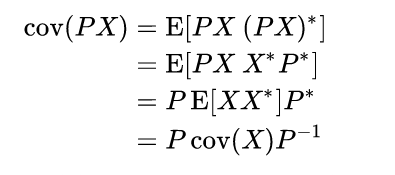

Image interpretation
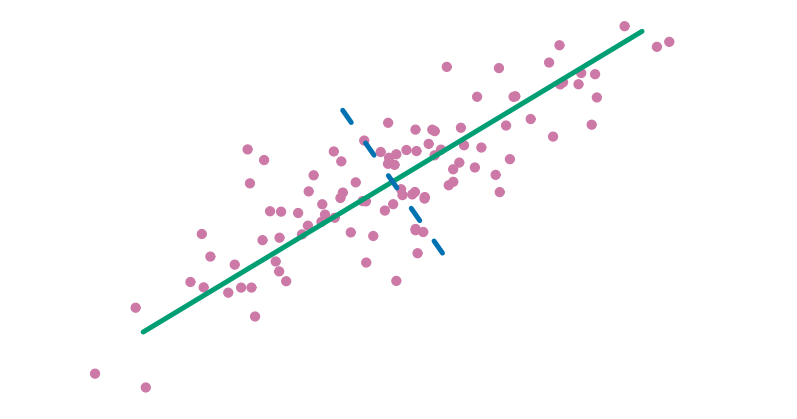




### Examples of application?
**Article:** 

https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7


Use PCA to study the reasons why some properties have not been sold for a long time.

https://pca4ds.github.io/application-examples.html

Some applications of PCA in various case studies.

### Example Code

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision= 4,suppress=True)

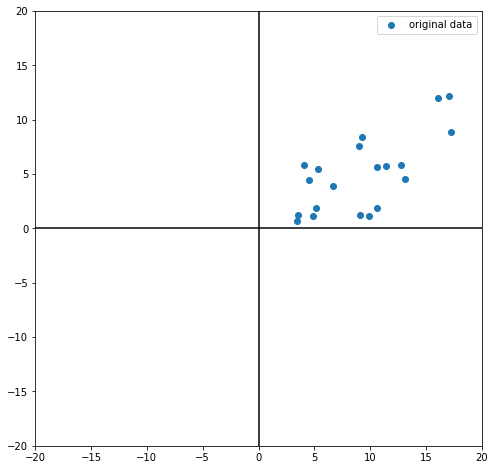

In [2]:
#Randomly generated data
np.random.seed(2)
data = np.random.uniform(1,20,(20,2))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-4,4,(20,1))

#Draw original data graph
size = 20
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [3]:
#Take the mean point of the original data as the origin
data_norm = data-data.mean(axis = 0)
data_norm

array([[ 0.088 ,  3.3809],
       [ 2.2477,  0.7444],
       [-0.2089,  2.6322],
       [-4.3075, -3.8004],
       [-2.5024, -1.0936],
       [ 3.6057,  0.8437],
       [-5.6389, -3.705 ],
       [-4.6915, -0.5128],
       [ 8.0297,  3.9202],
       [ 7.8888,  7.1948],
       [ 1.4038,  0.6761],
       [-0.0615, -3.7535],
       [-5.7798, -4.3387],
       [-3.9016,  0.4765],
       [-4.0101, -3.1343],
       [ 0.6921, -3.8158],
       [ 3.9719, -0.4162],
       [ 1.4036, -3.1405],
       [ 6.8832,  7.0129],
       [-5.1122,  0.829 ]])

In [4]:
#Calculate covariance matrix

C = np.cov(data_norm.T)
C

array([[20.0979, 10.9159],
       [10.9159, 12.3302]])

In [5]:
#Calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(C)

#Reorder, from large to small
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

In [6]:
#Eigenvector corresponding to the first eigenvalue
vals[0],vecs[:,0]

(27.80025909969357, array([0.8171, 0.5765]))

In [7]:
#Eigenvector corresponding to the second eigenvalue
vals[1],vecs[:,1]

(4.627791045140581, array([-0.5765,  0.8171]))

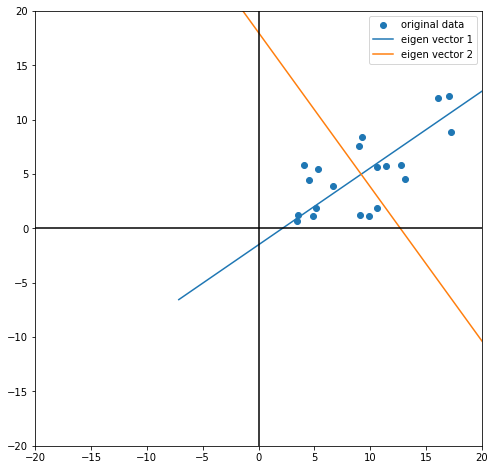

In [9]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [10]:
#The projection coordinate of data on principal component one is Y
Q = vecs[:,:1]
Y = np.matmul(data_norm,Q)
Y

array([[ 2.0211],
       [ 2.2657],
       [ 1.3469],
       [-5.7106],
       [-2.6751],
       [ 3.4325],
       [-6.7434],
       [-4.1289],
       [ 8.8209],
       [10.5938],
       [ 1.5368],
       [-2.2143],
       [-7.2239],
       [-2.9132],
       [-5.0836],
       [-1.6345],
       [ 3.0054],
       [-0.6638],
       [ 9.6673],
       [-3.6991]])

In [11]:
#Add the mean value to restore the data
data_ = np.matmul(Y,Q.T)+data.mean(0)
data_

array([[10.8473,  6.1427],
       [11.0471,  6.2837],
       [10.2964,  5.754 ],
       [ 4.5299,  1.6851],
       [ 7.0101,  3.4351],
       [12.0005,  6.9564],
       [ 3.686 ,  1.0896],
       [ 5.8222,  2.597 ],
       [16.4032, 10.063 ],
       [17.8518, 11.0851],
       [10.4515,  5.8635],
       [ 7.3866,  3.7008],
       [ 3.2934,  0.8126],
       [ 6.8156,  3.2979],
       [ 5.0422,  2.0466],
       [ 7.8604,  4.0351],
       [11.6515,  6.7101],
       [ 8.6535,  4.5948],
       [17.0948, 10.551 ],
       [ 6.1735,  2.8448]])

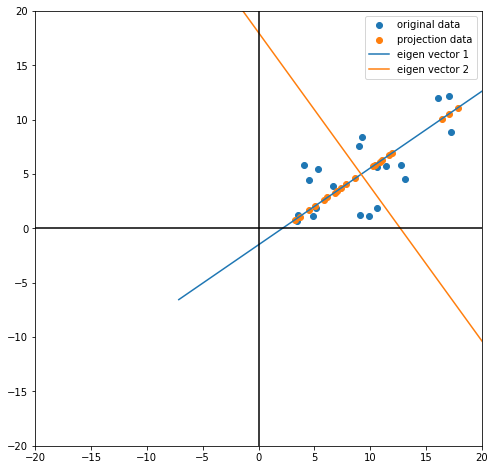

In [14]:
#Draw scatter chart
plt.figure(1,(8,8))
plt.scatter(data[:,0],data[:,1],label='original data')
plt.scatter(data_[:,0],data_[:,1],label='projection data')

#Draw the axis where the corresponding direction of the first eigenvector passes the mean point
i=0
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw the axis where the corresponding direction of the second eigenvector passes the mean point
i=1
ev = np.array([vecs[:,i]*-1,vecs[:,i]])*size
ev = (ev+data.mean(0))
plt.plot(ev[:,0],ev[:,1],label = 'eigen vector '+str(i+1))

#Draw x-axis y-axis
plt.plot([-size,size],[0,0],c='black')
plt.plot([0,0],[-size,size],c='black')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.legend()
plt.show()

In [21]:
#Perform PCA on 3D data
import matplotlib.pyplot as mpld3
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [24]:
#Randomly generate 3D data
np.random.seed(0)
data = np.random.uniform(-10,10,(20,3))
data[:,1:] = 0.5*data[:,0:1]+np.random.uniform(-2,2,(20,1))
data[:,2:] = 0.5*data[:,0:1]+np.random.uniform(-3,3,(20,1))
data

array([[ 0.9763, -0.876 , -0.604 ],
       [ 0.8977, -1.1097, -0.0656],
       [-1.2483,  0.0012, -3.2392],
       [-2.3312, -2.6129, -0.0108],
       [ 1.3609, -0.5332,  1.0801],
       [-8.2574, -4.6538, -5.5364],
       [ 5.5631,  4.0655,  2.9211],
       [ 5.9832,  1.38  ,  0.5552],
       [-7.6345, -2.4655, -3.3616],
       [ 8.8934,  2.8311,  7.0225],
       [-4.7089, -0.4486, -3.443 ],
       [ 1.3687,  0.5589,  1.6888],
       [ 2.2419,  3.028 , -1.0883],
       [ 3.6364,  2.2376,  3.1162],
       [ 3.9526,  2.9334,  0.7127],
       [ 3.4128, -0.1369, -0.1945],
       [-3.6914, -2.7145, -1.3266],
       [-1.228 , -2.1332, -3.4933],
       [-5.8225, -3.7267, -0.9376],
       [-4.9342, -3.9922, -5.4389]])

In [25]:
#Take the mean point as the origin
data_normal = data-data.mean(0)
data_normal 

array([[ 1.0547, -0.4576, -0.0218],
       [ 0.9761, -0.6913,  0.5166],
       [-1.1698,  0.4196, -2.6571],
       [-2.2527, -2.1945,  0.5714],
       [ 1.4394, -0.1149,  1.6622],
       [-8.1789, -4.2354, -4.9542],
       [ 5.6416,  4.4839,  3.5032],
       [ 6.0616,  1.7984,  1.1374],
       [-7.556 , -2.0471, -2.7794],
       [ 8.9718,  3.2494,  7.6046],
       [-4.6304, -0.0302, -2.8609],
       [ 1.4471,  0.9773,  2.271 ],
       [ 2.3204,  3.4464, -0.5061],
       [ 3.7149,  2.656 ,  3.6983],
       [ 4.0311,  3.3517,  1.2949],
       [ 3.4912,  0.2815,  0.3877],
       [-3.613 , -2.2961, -0.7445],
       [-1.1495, -1.7148, -2.9112],
       [-5.744 , -3.3083, -0.3554],
       [-4.8557, -3.5738, -4.8568]])

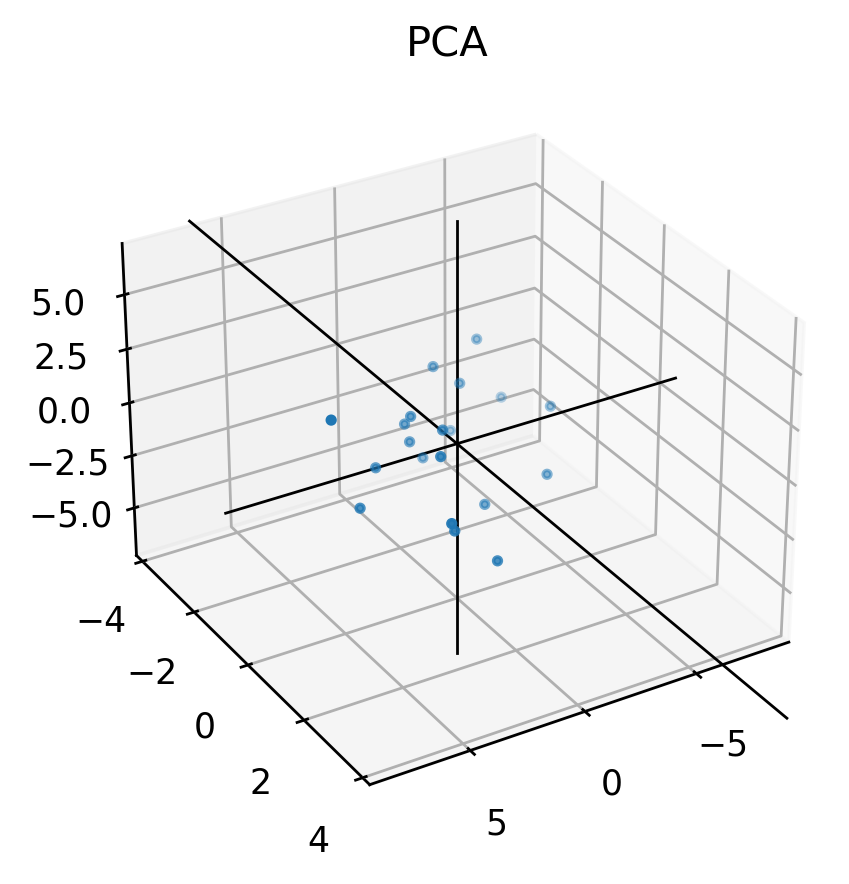

In [28]:
#Separating data
X = data[:,0]
Y = data[:,1]
Z = data[:,2]

for i in range(45,60):
    #Animation
    import IPython
    IPython.display.clear_output(wait=True)
    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')
    plt.cla()
    
    #Draw Scatter
    ax.scatter(X,Y,Z,s=5)

    #Draw xyz axis
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    #Drawing range
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()

In [29]:
#Calculate covariance matrix
C = np.cov(data_normal.T)

#Calculate eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(C)

#Reorder, from large to small
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]
vals,vecs

(array([34.5686,  2.4069,  1.2623]),
 array([[-0.7952, -0.2741, -0.5409],
        [-0.3904, -0.4512,  0.8025],
        [-0.464 ,  0.8493,  0.2518]]))

In [30]:
#Make projection data
zcf = np.matmul(data_normal,vecs[:,:2])
data_ = np.matmul(zcf,vecs[:,:2].T)+data.mean(0)
data_

array([[ 0.466 , -0.119 , -0.3664],
       [ 0.3823, -0.3452,  0.1743],
       [-1.0858, -0.2398, -3.3149],
       [-2.5468, -2.293 ,  0.0896],
       [ 1.1163, -0.1704,  1.1939],
       [-8.3776, -4.4755, -5.4804],
       [ 6.336 ,  2.919 ,  2.5613],
       [ 5.1451,  2.6233,  0.9454],
       [-6.6908, -3.8655, -3.8009],
       [ 8.7146,  3.0963,  7.1057],
       [-3.7568, -1.861 , -3.8863],
       [ 1.6788,  0.0988,  1.5444],
       [ 2.99  ,  1.9181, -1.4365],
       [ 4.2061,  1.3924,  2.8509],
       [ 4.4044,  2.2631,  0.5024],
       [ 2.5662,  1.119 ,  0.1996],
       [-3.7324, -2.6537, -1.3076],
       [-2.0326, -0.9396, -3.1188],
       [-5.6263, -4.0178, -1.0289],
       [-5.7263, -2.817 , -5.0701]])

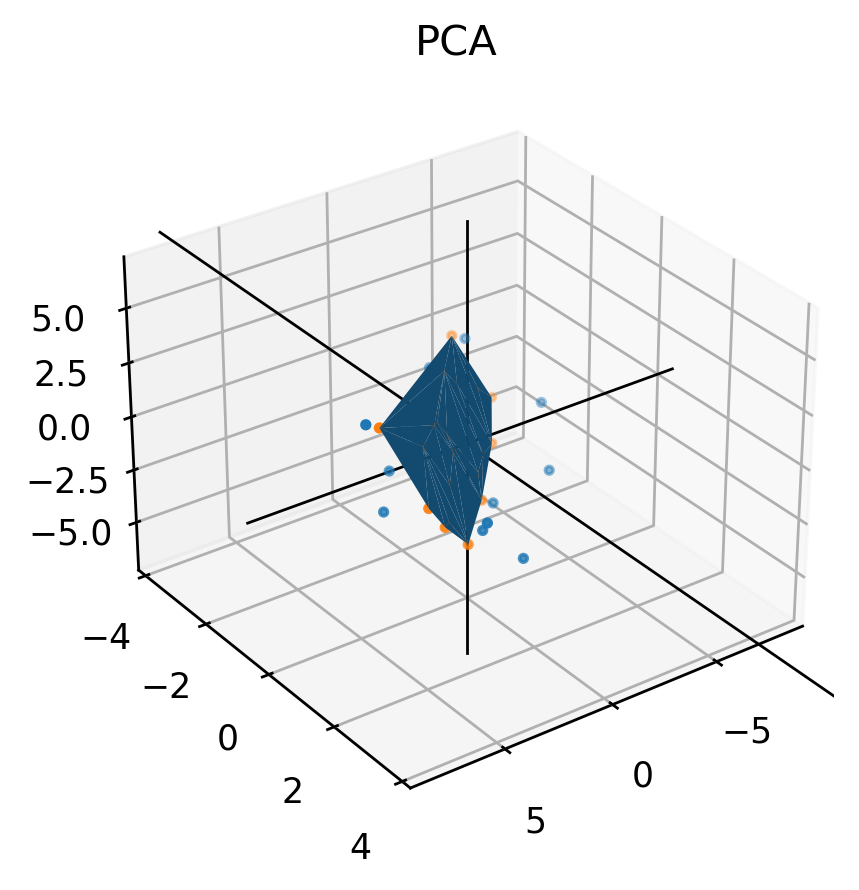

In [32]:
#Separating data
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
X_ = data_[:,0]
Y_ = data_[:,1]
Z_ = data_[:,2]

for i in range(35,55):
    #Animation
    import IPython
    IPython.display.clear_output(wait=True)
    fig = plt.figure(1,(6,4),dpi = 250)
    ax = fig.gca(projection='3d')
    plt.cla()
    
    #Draw Scatter
    ax.scatter(X,Y,Z,s=5,label='origin data') 
    ax.scatter(X_,Y_,Z_,s=5,label='restructured data')
    
    #Draw 3D plane
    ax.plot_trisurf(X_, Y_, Z_)
    
    #Draw xyz axis
    ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    #Drawing range
    ax.view_init(azim=i)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    plt.show()